# Symbolic and numerical integrations using Python

We have a very specific problem: calculate the ground state energy per site of a Ising model (a kind of quantum system on a lattice) as a function of $g$. This energy can be calculated using the following equation (this equation can be found at the article DAMSKI, B. "Fidelity susceptibility of the quantum Ising model in a transverse field: The exact solution". Physical Review E, v. 87, n. 5, p. 052131, 2013):

$ \epsilon(g) = \frac{1}{\pi}\int_0^{\pi}\sqrt{(g - \cos(x))^2 + \sin^2(x)}dx$.

To do this calculation in Python we use the sympy library, which integrates symbolic functions. But first we simplify the expression using the mentioned library as in the code below.

In [21]:
#Importing necessary libraries
import sympy as sym

x = sym.Symbol('x') #To guarantee that x is a symbolic variable, 
#not a computational variable
g = sym.Symbol('g') 

I = sym.simplify(sqrt((g - cos(x))**2 + sin(x)**2))

print(I)

sqrt(g**2 - 2*g*cos(x) + 1)


Now we can perform the definite integral using sympy library:

In [22]:
#Importing necessary libraries
import sympy as sym

x = sym.Symbol('x') 
g = sym.Symbol('g') 

#Simplifying the result
I = sym.simplify(sqrt((g - cos(x))**2 + sin(x)**2))

#Calculating the symbolic integral
e = (1/sym.pi)*sym.integrate(I,(x,0,sym.pi))

print(e)

Integral(sqrt(g**2 - 2*g*cos(x) + 1), (x, 0, pi))/pi


Note that the code does not give us a result: it does not calculated the integral! It is because the integral is not made by elementary functions. Integrals (or other expressions) that can not be put as a combination of elementary functions is called a special function. The integral we want to solve it is a special function. But, unfortunately, sympy can not decompose integrals into special functions, so we must need another Python library: the scipy. With this library we can perform a numerical integration which will gives our result for a given number of $g$. Then we iterate for all $g$ to recover the function of interest. Let us see about this.

In [47]:
#Importing necessary libraries
from numpy import pi
from sympy import sqrt, cos, sin
from scipy import integrate

g = 1.0

y = lambda x: sqrt((g-cos(x))**2 + sin(x)**2)
I = integrate.quad(y, 0, pi)

print(I)

e = (1/pi)*I[0]

print(e)

%d 
 (3.9999999999999996, 4.4408920985006255e-14)
1.2732395447351625


Note that now we can calculate our desired definite integral using numerical integration resources from scipy. Finally we need to recompute the energy $\epsilon$ for $g$ in the interval $[0,2]$ and this can be done by the following loop:

In [48]:
#Importing necessary libraries
from numpy import pi
from sympy import sqrt, cos, sin
from scipy import integrate

#Do the loop calculation
for i in range(0,21):
    g = 0.1*i

    y = lambda x: sqrt((g-cos(x))**2 + sin(x)**2)
    I = integrate.quad(y, 0, pi)

    e = (1/pi)*I[0]

    print(e)

1.0
1.002501566421584
1.0100252539845789
1.0226295149208584
1.0404170862358302
1.063544409973372
1.0922385835544972
1.1268286675869728
1.1678095085207265
1.2160009141097237
1.2732395447351625
1.342864022725127
1.4196192748982297
1.5008232436750164
1.585188300053977
1.6719262215361952
1.760508122204593
1.8505593362793402
1.9418043043913793
2.034034558740953
2.1270888199467435


With these results we can plot the energy as a function of $g$ to see the shape of the function and how $\epsilon$ varies as $g$ increases. The following code do the job.

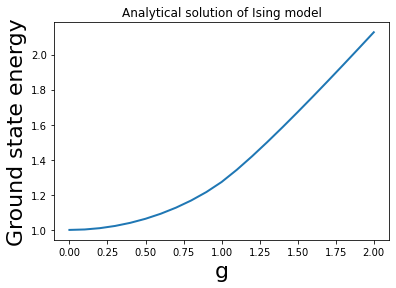

In [70]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sympy import sqrt, cos, sin
from scipy import integrate

#Start numpy arrays full with zeros to store the calculation results
result = np.zeros(21)
g = np.zeros(21)

#Start a numpy array for the values of g
for i in range(0,21):
    g[i] = 0.1*i

#Do the loop calculation
for i in range(0,21):
    y = lambda x: sqrt((g[i]-cos(x))**2 + sin(x)**2)
    I = integrate.quad(y, 0, np.pi)

    e = (1/np.pi)*I[0]
    result[i] = e
    
#Plot the result
plt.plot(g,result,linewidth=2)
plt.xlabel(r'g', fontsize=22)
plt.ylabel(r'Ground state energy',fontsize=22)
plt.title('Analytical solution of Ising model')
plt.show()

# Final remarks

The goal of this short Jupyter notebook is to show how one can perform symbolic operations using sympy and some integral calculations using both sympy and scipy. We started from a famous physics problem, the Ising model, and showed an applied example where (complicated) integrals appear. The integral seems so easily to handle, but as we stated it is hard to solve and can not be expressed in terms of elementary functions. We did one preliminary step, showing how we can perform symbolic simplifications using sympy and then showed the strange result: the sympy library does not give us anything! Finally we stressed how to solve the same problem but now using numeric integration from scipy and show how to iterate the calculations for a given set of the $g$ parameter.

We expect that the reader can now be more familiar with these calculations and does not need to fear bad results and inexpected ones: there is always a way to solve them. 

Any doubts, suggests, comments and other information send me an email: jvfrossard@gmail.com 

Thank you very much and see you in the next calculation!

P.S.: As a matter of curiosity, the results obtained here from numeric integration indeed have good agreement with those showed in the literature and with other numerical methods.